<a href="https://colab.research.google.com/github/MrIsdi/YOLOV8/blob/main/Yolov8_seed_tomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics roboflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.2/611.2 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.1 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=dc384917c69bd29e47f6127afd993c50717e07646b298583bde7c9cfac01e6ec
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstal

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="HwJI1YQDcxUBwYELeSey")
project = rf.workspace("ta-vmpcv").project("seed-tomato")
dataset = project.version(6).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.119, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Seed-Tomato-6 in yolov8:: 100%|██████████| 492/492 [00:00<00:00, 1815.96it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=150 imgsz=640

100% 21.5M/21.5M [00:00<00:00, 156MB/s]
Ultralytics YOLOv8.0.119 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Seed-Tomato-6/data.yaml, epochs=150, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, k

In [ ]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.119 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients
val: Scanning /content/Seed-Tomato-6/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100% 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.55it/s]
                   all         20        519      0.994      0.991      0.994      0.769
                 Belum         20        168      0.994      0.988      0.995      0.753
                Tumbuh         20        351      0.994      0.995      0.993      0.785
Speed: 0.2ms preprocess, 28.9ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/val


In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images

Ultralytics YOLOv8.0.119 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients

image 1/10 /content/Seed-Tomato-6/test/images/20230505_115340-min_jpg.rf.13dddee0c8faaa073fd3a2f11ba7917a.jpg: 640x640 10 Belums, 21 Tumbuhs, 16.6ms
image 2/10 /content/Seed-Tomato-6/test/images/20230505_192618-min_jpg.rf.525e1c987a701bca6219bd758ef8221a.jpg: 640x640 11 Belums, 19 Tumbuhs, 16.3ms
image 3/10 /content/Seed-Tomato-6/test/images/20230505_192800-min_jpg.rf.5a255e41b99a83fd6ec29c417ea9af73.jpg: 640x640 7 Belums, 18 Tumbuhs, 16.2ms
image 4/10 /content/Seed-Tomato-6/test/images/20230505_192833-min_jpg.rf.946a546f5f68604efa167dd4f71b415c.jpg: 640x640 6 Belums, 20 Tumbuhs, 16.2ms
image 5/10 /content/Seed-Tomato-6/test/images/20230505_193113-min-1-_jpg.rf.15d8582b11031e3ba923f28f736ed499.jpg: 640x640 11 Belums, 19 Tumbuhs, 16.2ms
image 6/10 /content/Seed-Tomato-6/test/images/20230505_193121-min-1-_jpg.rf.d73ec4e3c05232c12a4f2

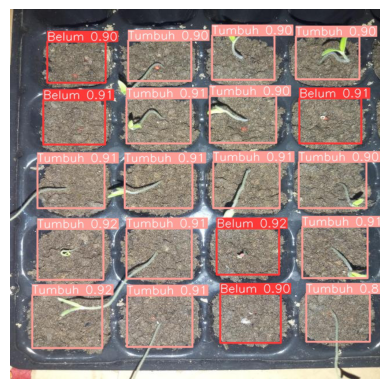

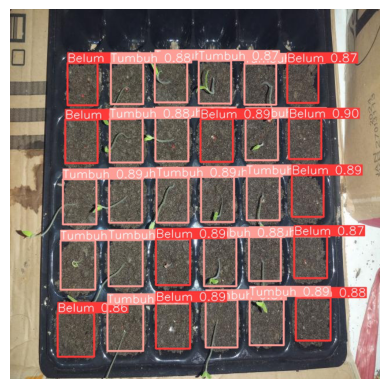

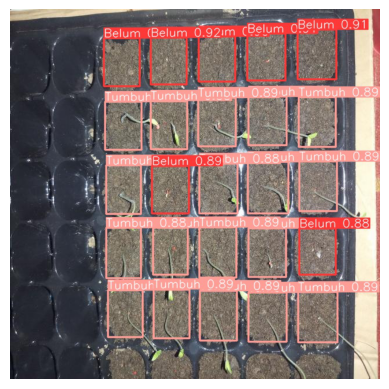

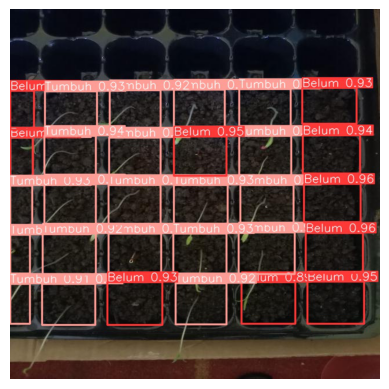

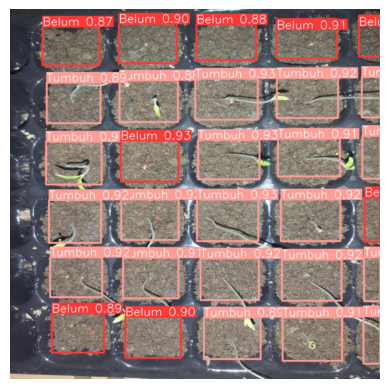

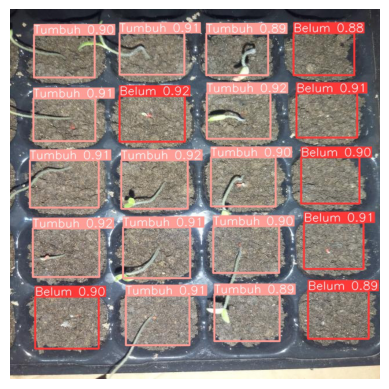

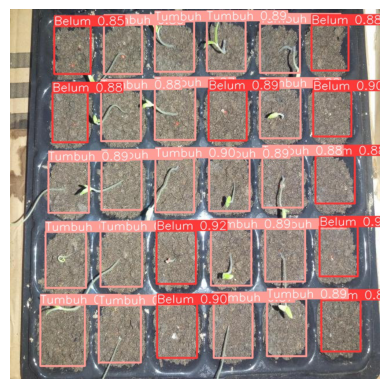

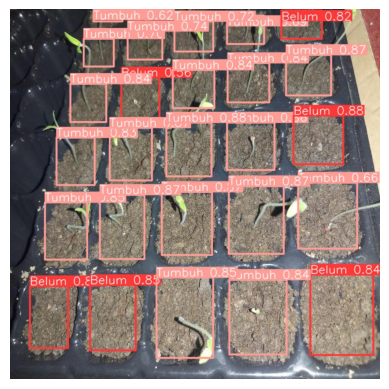

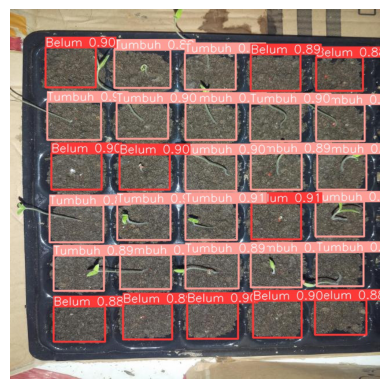

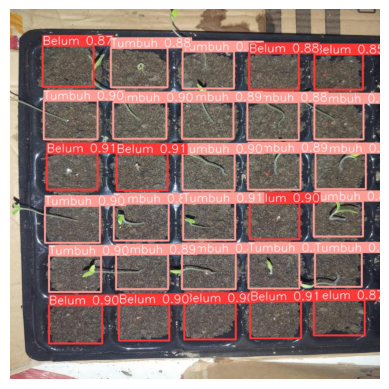

In [ ]:
import os
import matplotlib.pyplot as plt
image = os.listdir("runs/detect/predict")
for i in image:
  plt.imshow(plt.imread(f"runs/detect/predict/{i}"))
  plt.axis("off")
  plt.show()
  print()

In [ ]:
version = project.version(6)
version.deploy("yolov8", "runs/detect/train")

Dependency ultralytics<=8.0.20 is required but found version=8.0.119, to fix: `pip install ultralytics<=8.0.20`
View the status of your deployment at: https://app.roboflow.com/ta-vmpcv/seed-tomato/deploy/6
Share your model with the world at: https://universe.roboflow.com/ta-vmpcv/seed-tomato/model/6


In [ ]:
from ultralytics import YOLO

model = YOLO("runs/detect/train/weights/best.pt")
results = model.predict("Day2m.jpg", save=True, imgsz=640, conf=0.25, boxes=True)


image 1/1 /content/Day2m.jpg: 640x480 19 Belums, 12 Tumbuhs, 13.2ms
Speed: 4.0ms preprocess, 13.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


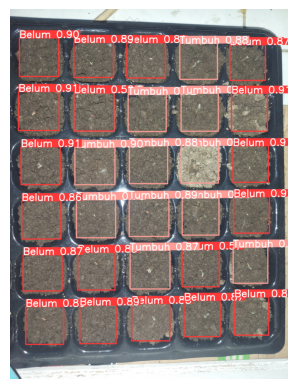

In [ ]:
plt.imshow(plt.imread("runs/detect/predict3/Day2m.jpg"))
plt.axis("off")
plt.show()

In [ ]:
for result in results:
  boxes = result.boxes

In [ ]:
cls = [ ("Tumbuh" if i == 1 else "Belum") for i in boxes.cls ]
cls

['Belum',
 'Belum',
 'Belum',
 'Belum',
 'Belum',
 'Tumbuh',
 'Belum',
 'Belum',
 'Tumbuh',
 'Belum',
 'Belum',
 'Belum',
 'Tumbuh',
 'Tumbuh',
 'Belum',
 'Tumbuh',
 'Belum',
 'Belum',
 'Belum',
 'Tumbuh',
 'Belum',
 'Belum',
 'Tumbuh',
 'Belum',
 'Tumbuh',
 'Tumbuh',
 'Tumbuh',
 'Belum',
 'Tumbuh',
 'Belum',
 'Tumbuh']

In [ ]:
import shutil
target = r"/content/drive/MyDrive/yolov8-seedTomato"
original = r"/content/runs"
shutil.move(original, target)

'/content/drive/MyDrive/yolov8-seedTomato/runs'